# Plotting Virginia Tech Starting Salaries

This project utilizes Virginia Tech's post-graduate salary reports from 2005-2017 to identify and visualize starting salaries for different majors over time. It also compares this data with national average salary data for the same years.

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import math

## Web Scraping VT Starting Salaries
Let's start by defining some functions to web scrape VT's post-graduate reports in order to obtain starting salary information for each college. 

In [3]:
#Scrape salary data from VT website
grad_stuff = pd.read_html('https://db.career.vt.edu/scripts/PostGrad2006/Report/DetailReportSalaries.asp?College=03&Cohort=2008-2009&Majors=Y')#, attrs = {'id': 'table'}) 

#Each college is represented by their respective keys in the grad report url 
college_keys = {'College of Agriculture and Life Sciences':'01',
                'College of Architecture and Urban Studies':'02',
                'Pamplin College of Business':'03',
                'College of Engineering':'05',
                'College of Liberal Arts and Human Sciences':'07',
                'College of Science':'08',
                'College of Natural Resources and Environment':'10'}

def parse_year_report(college, year):
    #Get relevant info from post-grad reports
    report = str(year-1) + '-' + str(year)
    vt_url = "https://db.career.vt.edu/scripts/PostGrad2006/Report/DetailReportSalaries.asp?College=" + college_keys[college] + "&Cohort=" + report + "&Majors=Y"
    response = requests.get(vt_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    find_majors = soup.find_all("td",attrs={'width':'25%', 'class':'text11', 'colspan':'2'})
    find_emp_rate = soup.find_all("td",attrs={'align':'right','class':'maroon11text','bgcolor':'#F0FFDD','width':'9%'})
    find_salaries_25 = soup.find_all("td",attrs={'align':'right','class':'darkgray11','width':'9%'})
    find_salaries_50 = soup.find_all("td",attrs={'align':'right','class':'maroon11text','bgcolor':'#E6F2E7'})
    find_salaries_75 = soup.find_all("td",attrs={'align':'right','class':'faded11text','width':'9%'})
    #Get salary numbers for each major found in the report 
    grad_info = []
    for i, major in enumerate(find_majors):
        if i == 0: #insert college summary 
            major = college
        else:
            major = find_majors[i-1].text
            major = major.strip()
        emp_rate = find_emp_rate[i].text
        emp_rate = emp_rate.strip().replace('%','')
        salary_25 = find_salaries_25[(i*2)+1].text #every other item in salary item 
        salary_25 = salary_25.strip().replace('$','').replace(',','')
        salary_50 = find_salaries_50[i].text
        salary_50 = salary_50.strip().replace('$','').replace(',','')
        salary_75 = find_salaries_75[i].text
        salary_75 = salary_75.strip().replace('$','').replace(',','')
        grad_info.append([major, year, emp_rate, salary_25, salary_50, salary_75])
    grad_df = pd.DataFrame(grad_info, columns=['Major','Year','Emp_Rate','Salary_25%','Median_Salary','Salary_75%'])
    final_df = grad_df[grad_df['Median_Salary'] != '**'] #remove rows with no median salary
    return final_df
    
def starting_salary_info(college):
    #Combine all years into one dataframe
    grad_df_dict = {}
    for i in range(2004,2018):
        grad_df_dict[i] = parse_year_report(college,i)
    college_df = pd.concat(grad_df_dict.values(), ignore_index=True)
    college_df[['Emp_Rate','Salary_25%','Median_Salary','Salary_75%']] = college_df[['Emp_Rate','Salary_25%','Median_Salary','Salary_75%']].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    return college_df

starting_salary_info('Pamplin College of Business') #preview sample dataframe

,Major,Year,Emp_Rate,Salary_25%,Median_Salary,Salary_75%
0,Pamplin College of Business,2004,89,33000.0,39325,45000.0
1,Accounting & Information Systems,2004,89,35520.0,41500,43750.0
2,Business Information Technology,2004,96,40000.0,48000,50000.0
3,"Economics, Business",2004,80,31700.0,35600,42250.0
4,Finance,2004,87,34750.0,40000,45000.0
5,Hospitality & Tourism Management,2004,92,26625.0,31000,34500.0
6,Management,2004,89,30071.0,36000,40000.0
7,Pamplin College of Business,2005,91,35040.0,41000,48000.0
8,Accounting & Information Systems,2005,96,39000.0,43265,46000.0
9,Business Information Technology,2005,92,44000.0,49000,52500.0


## Web Scraping National Average Starting Salaries
Now that we have salary data for Virginia Tech graduates, let's obtain average starting salaries for all US graduates so that we can later compare salary trends of each major to the US trend as a whole.

We'll use National Association of Colleges and Employers data by web scraping their salary trend article (http://www.naceweb.org/job-market/compensation/salary-trends-through-salary-survey-a-historical-perspective-on-starting-salaries-for-new-college-graduates/).

In [8]:
#Get average starting salary by year 
salary_url = "http://www.naceweb.org/job-market/compensation/salary-trends-through-salary-survey-a-historical-perspective-on-starting-salaries-for-new-college-graduates/"
response = requests.get(salary_url)
soup = BeautifulSoup(response.content, 'html.parser')
get_grad_salaries = soup.find_all("tr")[45:57] 
avg_salaries = []
for salary in get_grad_salaries:
    get_year = salary.find_all("td")[0]
    get_amount = salary.find_all("td")[1]
    year = int(get_year.text)
    amount = get_amount.text
    sal = int(amount.replace('$','').replace(',',''))
    temp_df = pd.DataFrame([[year, sal]], columns=('Year','Salary'))
    avg_salaries.append([year, sal])

This report has starting salaries from 2004 to 2015. After googling NACE data for 2016 and 2017, I found some updated numbers to append to the current list. 
* 2016: https://www.naceweb.org/job-market/compensation/average-starting-salary-for-class-of-2016-held-steady/ 
* 2017: http://www.naceweb.org/job-market/compensation/early-data-show-gains-dips-in-starting-salaries/

In [145]:
#Add new data to dataframe
avg_salaries.append([2016, 50359]) 
avg_salaries.append([2017, 51022])
avg_sal_df = pd.DataFrame(avg_salaries,columns=('Year','Salary'))
avg_sal_df #preview dataframe

,Year,Salary
0,2004,39960
1,2005,42081
2,2006,43321
3,2007,45725
4,2008,49224
5,2009,48633
6,2010,48288
7,2011,51171
8,2012,44259
9,2013,45327


## Plotting Starting Salary Data

Now that we have all of our data relevant data, let's go ahead and develop a function that generates line charts for each department.

In [140]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

def plot_college_salaries(college):
    title = 'VT ' + college + ' Starting Salaries'
    college_df = college_df_dict[college]
    majors = college_df['Major'].unique()
    majors_list = majors.tolist()
    chart_rows = math.ceil(len(majors_list)/4)
    fig = plt.figure(figsize=(15,chart_rows*5))
    plt.suptitle(college + ' Starting Salaries Trend', fontsize=18, fontname = 'Verdana', weight='bold', ha='center')
    for i, major in enumerate(majors_list):
        df = college_df[college_df['Major']==major]
        ax = fig.add_subplot(chart_rows, 4, i+1)
        ax.plot(avg_sal_df['Year'], avg_sal_df['Salary'], label='average', c=(71/255, 0/255, 179/255), marker='o', ms=4, alpha = 0.8)
        ax.plot(df['Year'], df['Median_Salary'], label=major, marker='o', c='g', ms=4)
        ax.plot(df['Year'], df['Salary_25%'], label=major, lw=0.05, c='g', ms=4, alpha=0.5)
        ax.plot(df['Year'], df['Salary_75%'], label=major, lw=0.05, c='g', ms=4, alpha=0.5)
        ax.fill_between(df['Year'], df['Salary_75%'], df['Salary_25%'], color='g', alpha=0.1)
        ax.set_xlim(2004,2017)
        ax.set_ylim(0,85000)
        ax.set_title(major, fontname= 'Verdana', fontsize=11)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.yaxis.grid(linewidth=0.4)
        ax.set_facecolor((240/255, 240/255, 247/255))
        ax.tick_params(left=False, bottom=False)
        ax.xaxis.set_ticklabels(['', 2006, '', 2010, '', 2014])
        if (i in [0, 4, 8, 12]):
            ax.yaxis.set_ticklabels(['', 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
            if i == 0: 
                custom_lines = [Line2D([0], [0], color='g', lw=4),
                                Line2D([0], [0], color='g', alpha = 0.4, lw=6),
                                Line2D([0], [0], color=(71/255, 0/255, 179/255), lw=4)]
                ax.legend(custom_lines, ['Median VT Major Salary', '25th - 75th Salary Percentile',
                                         'Average National Salary'], loc='upper left')
        else:
            ax.yaxis.set_ticklabels([])
        plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=2)

Let's now use our function to explore salary trends for some of the most populated departments. 

Some things to note:
* We only have median salary data for VT majors and average salary data nationally. Regardless, these are still useful to compare.
* Due to small sample size, some data points are not included for some of the smaller majors.
* Data points for newer majors will only appear in recent years.

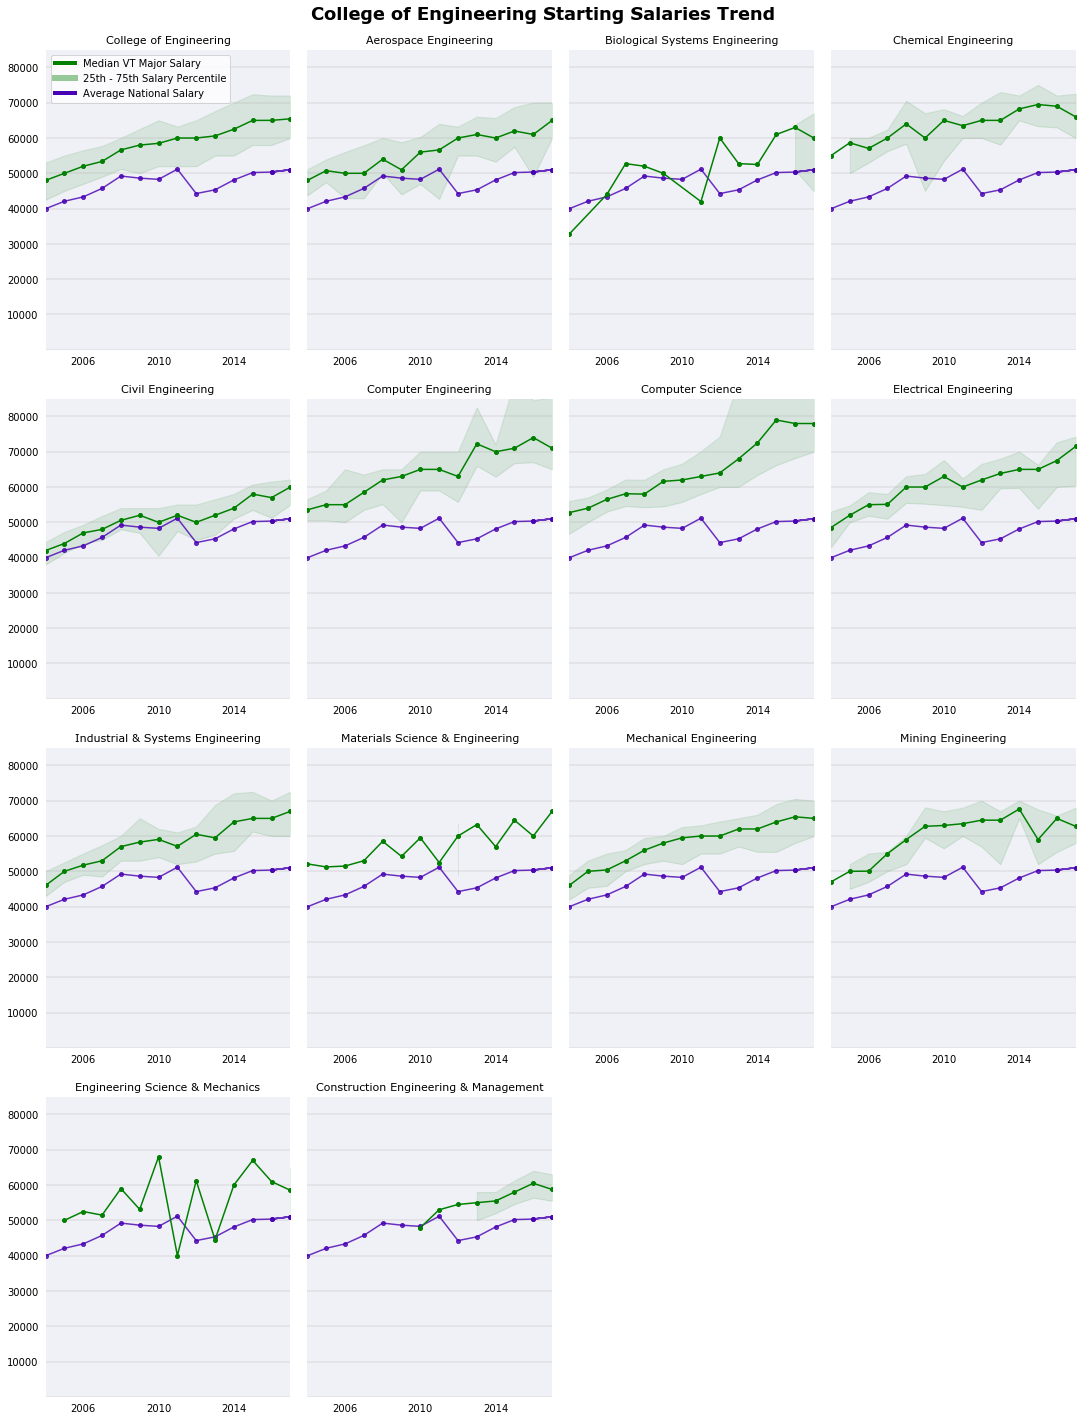

In [146]:
plot_college_salaries('College of Engineering')
plt.subplots_adjust(top=0.95)

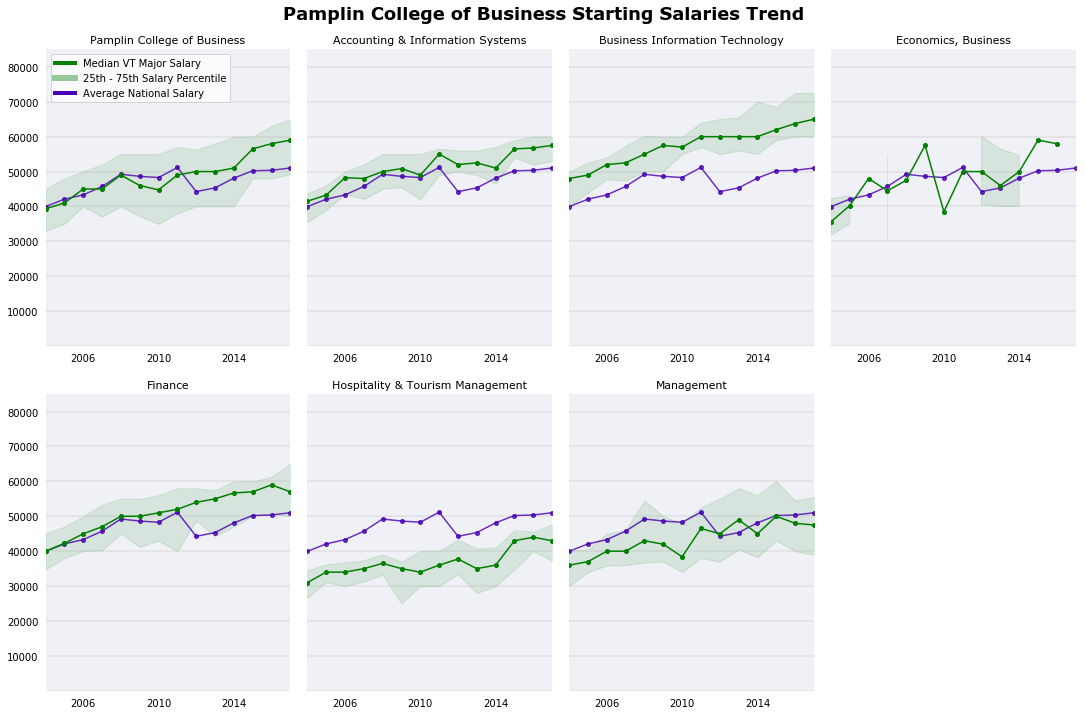

In [142]:
plot_college_salaries('Pamplin College of Business')
plt.subplots_adjust(top=0.92)

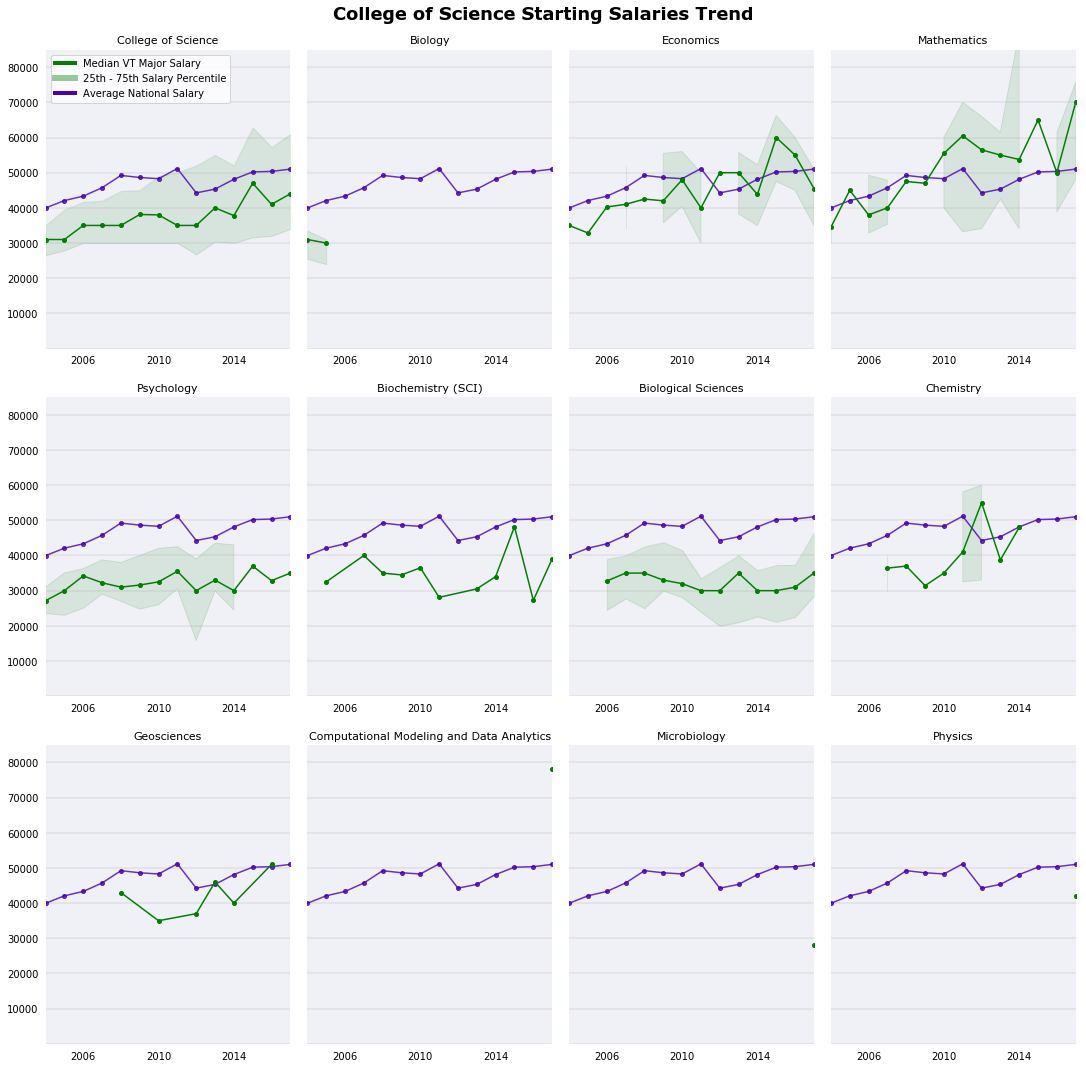

In [143]:
plot_college_salaries('College of Science')
plt.subplots_adjust(top=0.94)

## Conclusion

We can now see which Virginia Tech majors earn the most money upon graduation, as well as how these salaries stack up against the national average. We also get a glimpse into salary trends for each major and department as a whole. 

## Possible Further Steps

* Write a function to visualize the top 10 paying majors in one figure
* Clean the data to combine similar major names into one (i.e. Biology and Biological Sciences)
* Adjust salary numbers for inflation
* Write a function to plot employment rate instead of starting salary 